In [70]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
db = json.load(open("database.json"))
nutrients = pd.DataFrame(db[0]['nutrients'])

In [3]:
len(db)
nutrients.head()


,value,units,description,group
0,25.18,g,Protein,Composition
1,29.20,g,Total lipid (fat),Composition
2,3.06,g,"Carbohydrate, by difference",Composition
3,3.28,g,Ash,Other
4,376.00,kcal,Energy,Energy


In [4]:
nutrients.tail()

,value,units,description,group
157,1.472,g,Serine,Amino Acids
158,93.000,mg,Cholesterol,Other
159,18.584,g,"Fatty acids, total saturated",Other
160,8.275,g,"Fatty acids, total monounsaturated",Other
161,0.830,g,"Fatty acids, total polyunsaturated",Other


In [5]:
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [6]:
db[1].values()

dict_values([1009, 'Cheese, cheddar', [], '', 'Dairy and Egg Products', [{'amount': 1, 'unit': 'cup, diced', 'grams': 132.0}, {'amount': 2, 'unit': 'cup, melted', 'grams': 244.0}, {'amount': 3, 'unit': 'cup, shredded', 'grams': 113.0}, {'amount': 4, 'unit': 'oz', 'grams': 28.35}, {'amount': 5, 'unit': 'cubic inch', 'grams': 17.0}, {'amount': 6, 'unit': 'slice (1 oz)', 'grams': 28.0}], [{'value': 24.9, 'units': 'g', 'description': 'Protein', 'group': 'Composition'}, {'value': 33.14, 'units': 'g', 'description': 'Total lipid (fat)', 'group': 'Composition'}, {'value': 1.28, 'units': 'g', 'description': 'Carbohydrate, by difference', 'group': 'Composition'}, {'value': 3.93, 'units': 'g', 'description': 'Ash', 'group': 'Other'}, {'value': 403.0, 'units': 'kcal', 'description': 'Energy', 'group': 'Energy'}, {'value': 0.24, 'units': 'g', 'description': 'Sucrose', 'group': 'Sugars'}, {'value': 0.23, 'units': 'g', 'description': 'Lactose', 'group': 'Sugars'}, {'value': 0.15, 'units': 'g', 'desc

In [7]:
info_keys = ['id', 'description', 'manufacturer', 'group']

info = pd.DataFrame(db, columns=info_keys)
info.head()

,id,description,manufacturer,group
0,1008,"Cheese, caraway",,Dairy and Egg Products
1,1009,"Cheese, cheddar",,Dairy and Egg Products
2,1018,"Cheese, edam",,Dairy and Egg Products
3,1019,"Cheese, feta",,Dairy and Egg Products
4,1028,"Cheese, mozzarella, part skim milk",,Dairy and Egg Products


In [8]:
type(info.iloc[4])

pandas.core.series.Series

In [9]:
info.tail()

,id,description,manufacturer,group
6631,42161,"Bologna, beef, low fat",,Sausages and Luncheon Meats
6632,42173,"Turkey and pork sausage, fresh, bulk, patty or...",,Sausages and Luncheon Meats
6633,43408,"Babyfood, juice, pear",None,Baby Foods
6634,43539,"Babyfood, dessert, banana yogurt, strained",None,Baby Foods
6635,43546,"Babyfood, banana no tapioca, strained",None,Baby Foods


In [10]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            6636 non-null   int64 
 1   description   6636 non-null   object
 2   manufacturer  5195 non-null   object
 3   group         6636 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [11]:
info["group"].value_counts()

group
Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Beverages                            278
Soups, Sauces, and Gravies           275
Finfish and Shellfish Products       255
Baby Foods                           209
Cereal Grains and Pasta              183
Ethnic Foods                         165
Snacks                               162
Nut and Seed Products                128
Poultry Products                     116
Sausages and Luncheon Meats          111
Dairy and Egg Products               107
Fats and Oils                         97
Meals, Entrees, and Sidedishes        57
Restaurant Foods                      51
Spices and

In [34]:
    nutrients = []

    for rec in db:
        fnuts = pd.DataFrame(rec['nutrients'])
        fnuts["id"] = rec["id"]
        nutrients.append(fnuts)

    nutrients = pd.concat(nutrients, ignore_index=True)

In [13]:
nutrients

,value,units,description,group,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


In [14]:
nutrients.duplicated().sum()

np.int64(14179)

In [15]:
nutrients.drop_duplicates()

,value,units,description,group,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


In [16]:
col_names = {"description": "food", "group": "fgroup"}

In [17]:
info = info.rename(columns=col_names, copy=False)

In [18]:
info

,id,food,manufacturer,fgroup
0,1008,"Cheese, caraway",,Dairy and Egg Products
1,1009,"Cheese, cheddar",,Dairy and Egg Products
2,1018,"Cheese, edam",,Dairy and Egg Products
3,1019,"Cheese, feta",,Dairy and Egg Products
4,1028,"Cheese, mozzarella, part skim milk",,Dairy and Egg Products
...,...,...,...,...
6631,42161,"Bologna, beef, low fat",,Sausages and Luncheon Meats
6632,42173,"Turkey and pork sausage, fresh, bulk, patty or...",,Sausages and Luncheon Meats
6633,43408,"Babyfood, juice, pear",None,Baby Foods
6634,43539,"Babyfood, dessert, banana yogurt, strained",None,Baby Foods


In [19]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            6636 non-null   int64 
 1   food          6636 non-null   object
 2   manufacturer  5195 non-null   object
 3   fgroup        6636 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [20]:
col_names2 = {"description": "nutrient", "group": "nutgroup"}
nutrients = nutrients.rename(columns=col_names2, copy=False)

In [21]:
nutrients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389355 entries, 0 to 389354
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   value     389355 non-null  float64
 1   units     389355 non-null  object 
 2   nutrient  389355 non-null  object 
 3   nutgroup  389355 non-null  object 
 4   id        389355 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 14.9+ MB


In [22]:
newdata = pd.merge(nutrients, info, on="id")

In [29]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389355 entries, 0 to 389354
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   value         389355 non-null  float64
 1   units         389355 non-null  object 
 2   nutrient      389355 non-null  object 
 3   nutgroup      389355 non-null  object 
 4   id            389355 non-null  int64  
 5   food          389355 non-null  object 
 6   manufacturer  305162 non-null  object 
 7   fgroup        389355 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 23.8+ MB


In [67]:
result = newdata.groupby(["nutrient", "fgroup"])["value"].quantile(0.5)

<Axes: ylabel='fgroup'>

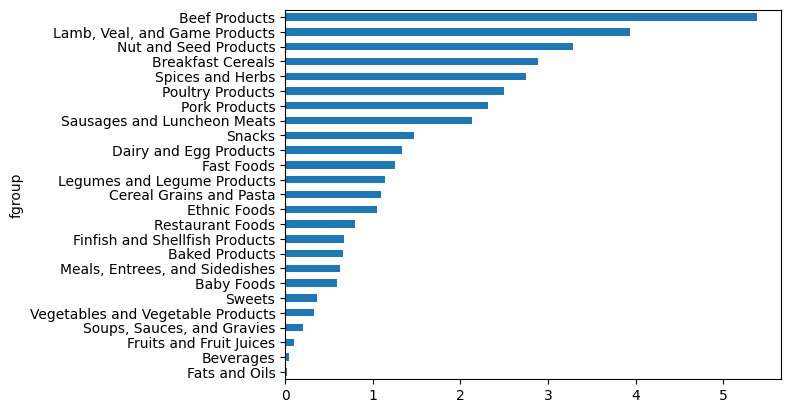

In [72]:
result["Zinc, Zn"].sort_values().plot(kind="barh")


# print(result.index)

<Axes: ylabel='fgroup'>

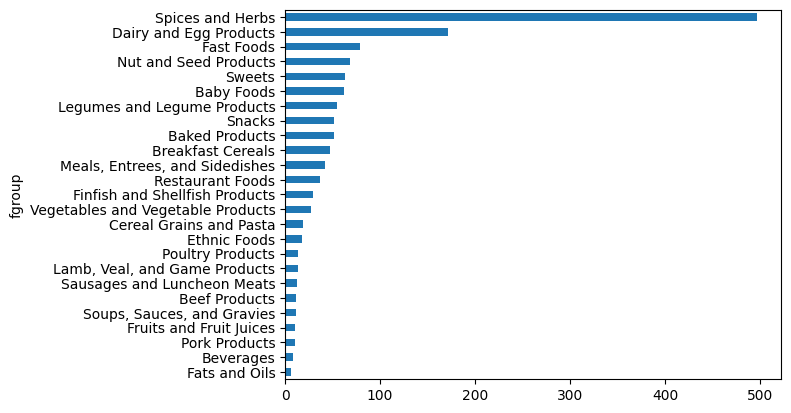

In [73]:
result["Calcium, Ca"].sort_values().plot(kind="barh")


<Axes: ylabel='fgroup'>

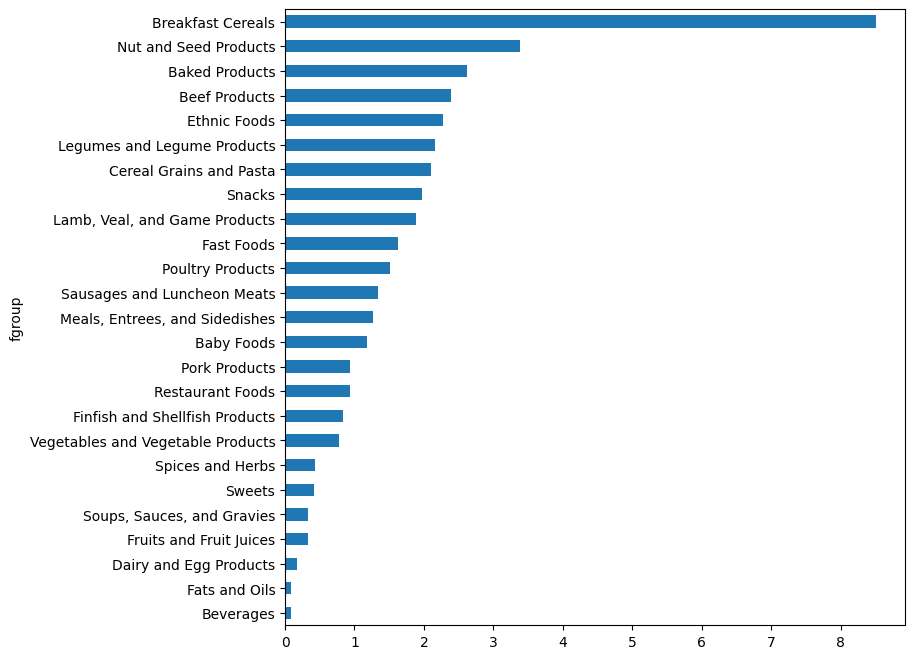

In [75]:
fig = plt.figure(figsize=(8,8))

result["Iron, Fe"].sort_values().plot(kind="barh")

In [79]:
fig.savefig("newfig.png", bbox_inches="tight")

In [80]:
by_nutrient = newdata.groupby(["nutgroup", "nutrient"])


In [89]:
def get_maximum(x):
    return x.loc[x.value.idxmax()]


In [91]:
max_foods = by_nutrient.apply(get_maximum)[["value", "food"]]

C:\Users\shyam\AppData\Local\Temp\ipykernel_22396\873454507.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  max_foods = by_nutrient.apply(get_maximum)[["value", "food"]]


In [86]:
max_foods.loc["Vitamins"]["food"]

nutrient
Betaine                                                            Quinoa, uncooked
Carotene, alpha                                                  Carrot, dehydrated
Carotene, beta                                    Peppers, sweet, red, freeze-dried
Choline, total                    Beef, variety meats and by-products, kidneys, ...
Cryptoxanthin, beta                                                 Spices, paprika
Dihydrophylloquinone              Margarine, 80% fat, stick, includes regular an...
Folate, DFE                              Cereals ready-to-eat, QUAKER, CAP'N CRUNCH
Folate, food                           Leavening agents, yeast, baker's, active dry
Folate, total                          Leavening agents, yeast, baker's, active dry
Folic acid                               Cereals ready-to-eat, QUAKER, CAP'N CRUNCH
Lutein + zeaxanthin                                                       Kale, raw
Lycopene                                                           

In [87]:
max_foods.loc["Amino Acids"]["food"]

nutrient
Alanine                           Gelatins, dry powder, unsweetened
Arginine                               Seeds, sesame flour, low-fat
Aspartic acid                                   Soy protein isolate
Cystine                Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                   Soy protein isolate
Glycine                           Gelatins, dry powder, unsweetened
Histidine                Whale, beluga, meat, dried (Alaska Native)
Hydroxyproline    KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...
Isoleucine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Leucine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Lysine            Seal, bearded (Oogruk), meat, dried (Alaska Na...
Methionine                    Fish, cod, Atlantic, dried and salted
Phenylalanine     Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Proline                           Gelatins, dry powder, unsweetened
Serine            Soy protein isolate, 